In [1]:
import os
from google.colab import drive
 
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/problems'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/problems


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Real_Combine.csv')

In [4]:
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


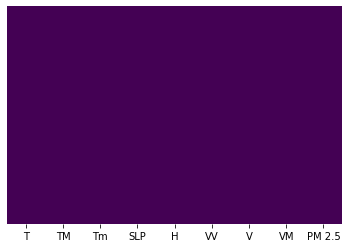

In [5]:
## Check for null values

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
#Percentage of null values
data.isnull().mean()

T         0.000000
TM        0.000000
Tm        0.000000
SLP       0.000000
H         0.000000
VV        0.000000
V         0.000000
VM        0.000000
PM 2.5    0.001368
dtype: float64

In [7]:
#Dropping the null values as only a small percentage of it is present
data=data.dropna()

In [8]:
sns.pairplot(data)

In [9]:
#Checking the corelation
data.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967276,0.958892,-0.884383,-0.518870,0.622637,0.326067,0.287138,-0.628336
TM,0.967276,1.000000,0.896699,-0.829254,-0.599629,0.598479,0.320116,0.299508,-0.569381
Tm,0.958892,0.896699,1.000000,-0.909514,-0.315305,0.560299,0.312904,0.259431,-0.669059
SLP,-0.884383,-0.829254,-0.909514,1.000000,0.274196,-0.491842,-0.346130,-0.299830,0.615615
H,-0.518870,-0.599629,-0.315305,0.274196,1.000000,-0.475279,-0.399079,-0.370981,0.174658
VV,0.622637,0.598479,0.560299,-0.491842,-0.475279,1.000000,0.402884,0.347493,-0.628621
V,0.326067,0.320116,0.312904,-0.346130,-0.399079,0.402884,1.000000,0.760777,-0.354799
VM,0.287138,0.299508,0.259431,-0.299830,-0.370981,0.347493,0.760777,1.000000,-0.283695
PM 2.5,-0.628336,-0.569381,-0.669059,0.615615,0.174658,-0.628621,-0.354799,-0.283695,1.000000


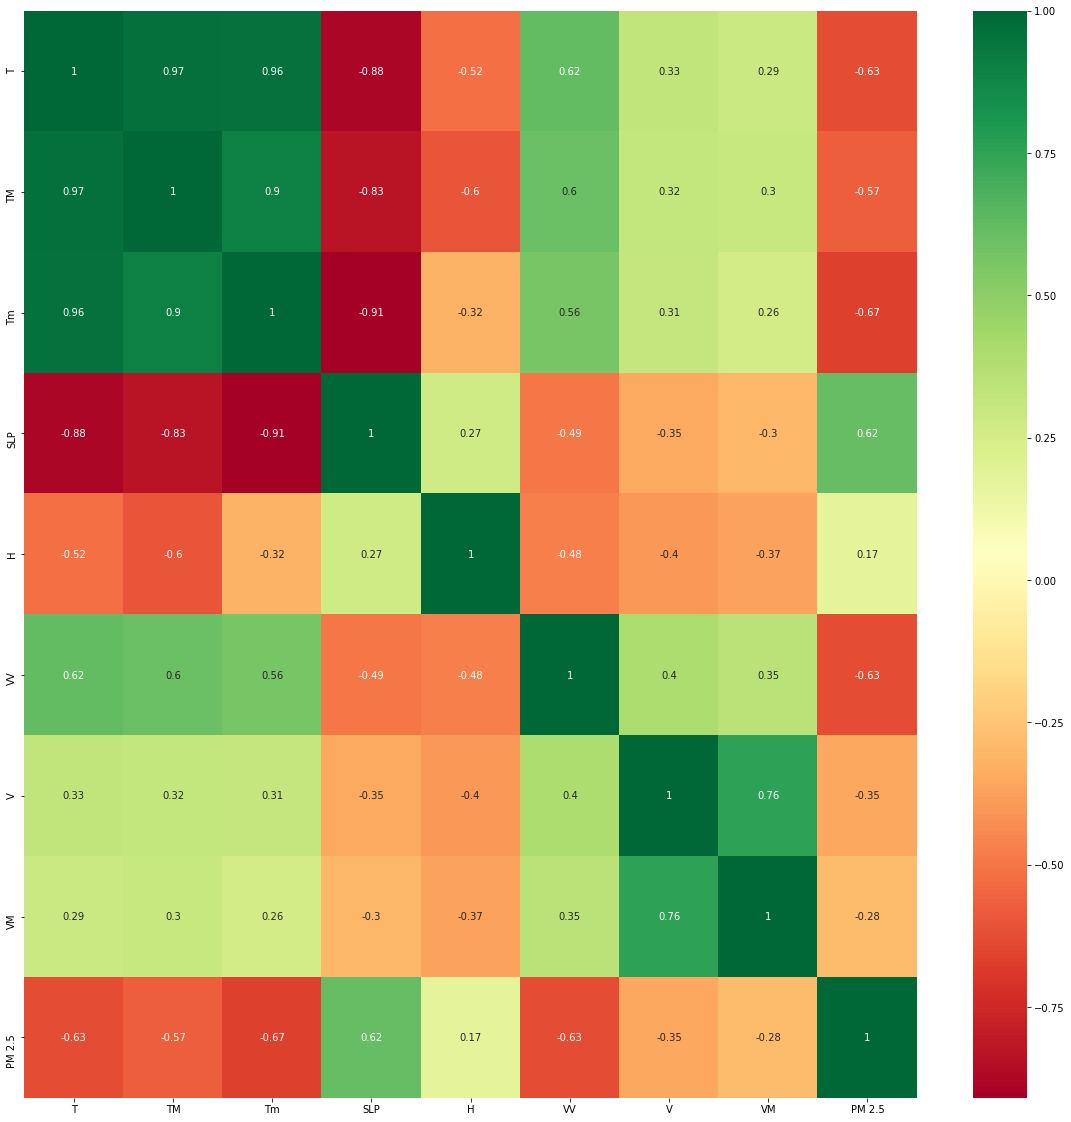

In [10]:
#get correlations of each features in dataset
corr = data.corr()

plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(corr,annot=True,cmap="RdYlGn")

In [11]:
X = data.drop('PM 2.5',axis=1)
y = data['PM 2.5']

In [12]:
#Checking feature importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

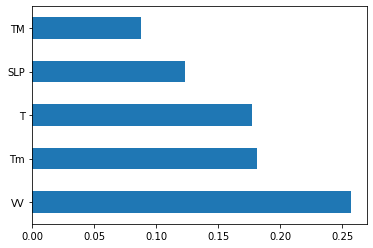

In [13]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

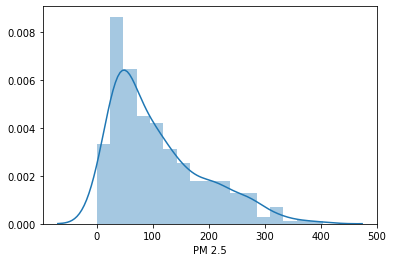

In [14]:
sns.distplot(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
import xgboost as xgb
regressor=xgb.XGBRegressor()
regressor.fit(X_train,y_train)
print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))

[02:32:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8607281497664878
0.6792207853681125


In [17]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

[02:32:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:32:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:32:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:32:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:32:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [18]:
score.mean()

0.5408681605575619

In [19]:
prediction=regressor.predict(X_test)

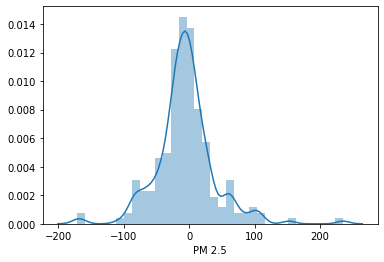

In [20]:
sns.distplot(y_test-prediction)

## Hyperparameter tuning using Randomized_Search_CV

In [21]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [22]:
from sklearn.model_selection import RandomizedSearchCV
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [23]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[02:32:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.6s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[02:32:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.6s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[02:32:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.5s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[02:32:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.5s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[02:32:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  4.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                            

In [24]:
xg_random.best_score_

-2641.4356387008706

In [25]:
xg_random.best_params_

{'learning_rate': '0.05',
 'max_depth': 10,
 'min_child_weight': 4,
 'n_estimators': 100,
 'subsample': 0.6}

In [26]:
regressor=xgb.XGBRegressor(learning_rate= 0.05,
 max_depth= 10,
 min_child_weight= 4,
 n_estimators= 100,
 subsample= 0.6)
regressor.fit(X_train,y_train)
prediction = regressor.predict(X_test)
print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))

[02:40:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9580545008420842
0.675447456320948


## Regression Evaluation Metrics

In [27]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 31.900516967250876
MSE: 2118.7289338890014
RMSE: 46.02965276741724


## Hyperparameter Tuning using GridSearchCv

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [xg_random.best_params_['max_depth']],
    'learning_rate': [xg_random.best_params_['learning_rate']],
    'subsample': [xg_random.best_params_['subsample'], 
                         xg_random.best_params_['subsample']+2, 
                         xg_random.best_params_['subsample'] + 4],
    'min_child_weight': [xg_random.best_params_['min_child_weight'] - 2,
                          xg_random.best_params_['min_child_weight'] - 1,
                          xg_random.best_params_['min_child_weight'], 
                          xg_random.best_params_['min_child_weight'] +1,
                          xg_random.best_params_['min_child_weight'] + 2],
    'n_estimators': [xg_random.best_params_['n_estimators'] - 200, xg_random.best_params_['n_estimators'] - 100, 
                     xg_random.best_params_['n_estimators'], 
                     xg_random.best_params_['n_estimators'] + 100, xg_random.best_params_['n_estimators'] + 200]
}

In [29]:
#### Fit the grid_search to the data
%%time
from xgboost import XGBRegressor
grid_search=GridSearchCV(estimator=XGBRegressor(),param_grid=param_grid,cv=10,n_jobs=-1,verbose=2,scoring='neg_mean_squared_error')
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:    6.7s


[02:40:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 1.46 s, sys: 67.2 ms, total: 1.52 s
Wall time: 29.6 s


[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   29.4s finished


In [30]:
grid_search.best_score_

-2635.6694454091657

In [31]:
grid_search.best_params_

{'learning_rate': '0.05',
 'max_depth': 10,
 'min_child_weight': 5,
 'n_estimators': 100,
 'subsample': 0.6}

In [32]:
xgbr = XGBRegressor(learning_rate=0.05,max_depth=10,n_estimators=100,subsample=0.6,min_child_weight=5)
xgbr.fit(X_train,y_train)
prediction = xgbr.predict(X_test)
print(xgbr.score(X_train,y_train))
print(xgbr.score(X_test,y_test))

[02:41:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.944654712307758
0.6764309647712194


## Regression Evaluation Metrics

In [33]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 32.23732389336852
MSE: 2112.308439423936
RMSE: 45.95985682553783


In [35]:
import pickle
pickle.dump(xgbr,open('xgbr.pkl','wb'))